# Model Training : ResNetRS50 without Data Augmentation

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Lion
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Activation, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_rs import ResNetRS50
from tensorflow.keras.applications.resnet_rs import preprocess_input
import pickle 
import numpy as np
import matplotlib.pyplot as plt

# Define paths for the training, validation, and test datasets
train_path = "c:/seven/train"
validation_path = "c:/seven/val"
test_path = "c:/seven/test"

# No data augmentation configurations were applied for training, validation, and test datasets
training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create data generators for training, validation, and testing
training_generator = training_datagen.flow_from_directory(train_path,
                                                          batch_size=32,
                                                          shuffle=True,
                                                          target_size=(224, 224),
                                                          class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                              batch_size=32,
                                                              shuffle=True,
                                                              target_size=(224, 224),
                                                              class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  batch_size=32,
                                                  shuffle=True,
                                                  target_size=(224, 224),
                                                  class_mode='categorical')

# Display class labels
training_generator.class_indices.keys()
validation_generator.class_indices.keys()
test_generator.class_indices.keys()

# Define image shape and create the ResNetRS50 base model
img_shape = (224, 224, 3)
ResNetRS50_model = ResNetRS50(input_shape=img_shape, include_top=False, weights='imagenet')
ResNetRS50_model.trainable = False

# Create the complete model architecture by adding layers to the base model
model_noda = Sequential([
    ResNetRS50_model,
    GlobalAveragePooling2D(),
    Dense(10240, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model with Lion optimizer, categorical crossentropy loss, and accuracy metric
model_noda.compile(optimizer=Lion(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.99,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        jit_compile=True,
        name='Lion',
    ), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for dynamic learning rate adjustment and early stopping
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

# Train the model using the data generators and callbacks
history_noda = model_noda.fit(training_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    callbacks=[rlr, es])

Found 14340 images belonging to 7 classes.
Found 1789 images belonging to 7 classes.
Found 1793 images belonging to 7 classes.
Epoch 1/100
449/449 [==============================] - 2298s 5s/step - loss: 0.6678 - accuracy: 0.7545 - val_loss: 0.5637 - val_accuracy: 0.7915 - lr: 1.0000e-04
Epoch 2/100
449/449 [==============================] - 2239s 5s/step - loss: 0.3803 - accuracy: 0.8589 - val_loss: 0.4949 - val_accuracy: 0.8099 - lr: 1.0000e-04
Epoch 3/100
449/449 [==============================] - 2410s 5s/step - loss: 0.2777 - accuracy: 0.9008 - val_loss: 0.4508 - val_accuracy: 0.8385 - lr: 1.0000e-04
Epoch 4/100
449/449 [==============================] - 2308s 5s/step - loss: 0.1925 - accuracy: 0.9300 - val_loss: 0.4961 - val_accuracy: 0.8306 - lr: 1.0000e-04
Epoch 5/100
449/449 [==============================] - 2311s 5s/step - loss: 0.1351 - accuracy: 0.9507 - val_loss: 0.5062 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 6/100
449/449 [==============================] - ETA: 0s 

## Model Evaluation with Test Dataset

In [3]:
# Evaluate the model on the test dataset and print loss and accuracy
score = model_noda.evaluate(test_generator)
print('loss : ', score[0])
print('accuracy : ', score[1])

57/57 [==============================] - 260s 5s/step - loss: 0.7007 - accuracy: 0.8416
loss :  0.7007310390472412
accuracy :  0.8416062593460083


## Saving the model & history

In [8]:
# Save the model
model_noda.save("C:/seven/model_resnetrs50_lion_dense10240_noda.h5")

In [9]:
import pickle

# Save the history from model.fit
file = open("C:/seven/history_noda.txt","wb") 
pickle.dump(history_noda, file) 
file.close()    

## Loading the model & history

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('C:/seven/model_resnetrs50_lion_dense10240_noda.h5')

In [ ]:
import pickle

file = open("C:/seven/history_noda.txt","rb") 
history = pickle.load(file) 
file.close()  

## Line Graph of Training Loss & Validation Loss

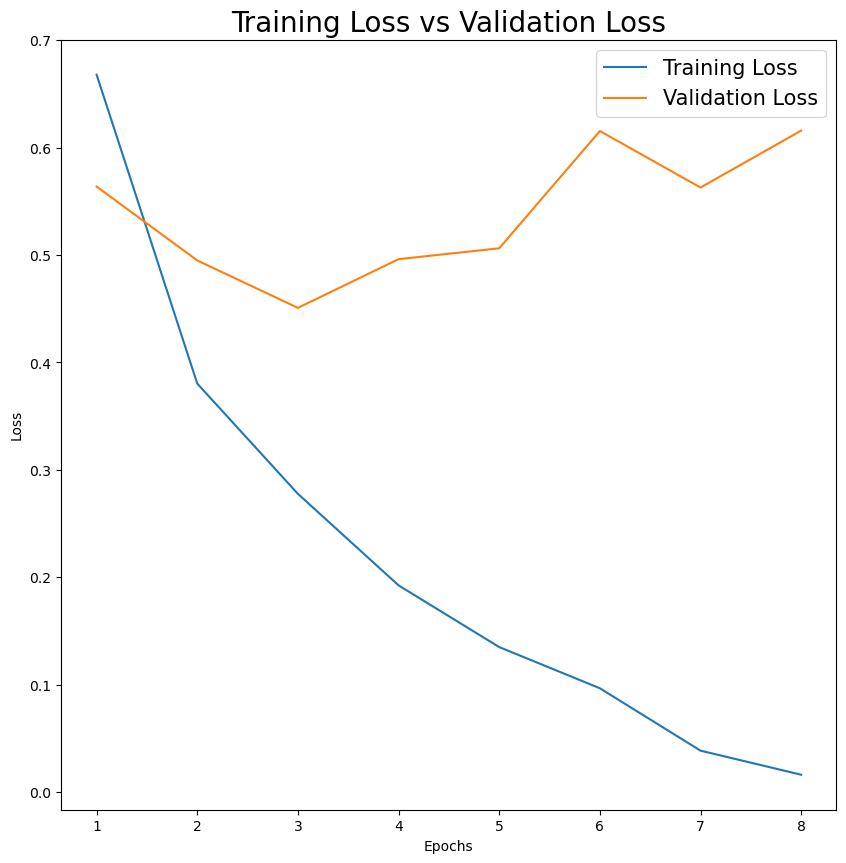

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of epochs
epochs = 8

# Plotting the training loss and validation loss over epochs
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, epochs+1), history_noda.history['loss'], label='Training Loss')
plt.plot(np.arange(1, epochs+1), history_noda.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss', fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize=15)
plt.show()

## Line Graph of Training Accuracy & Validation Accuracy

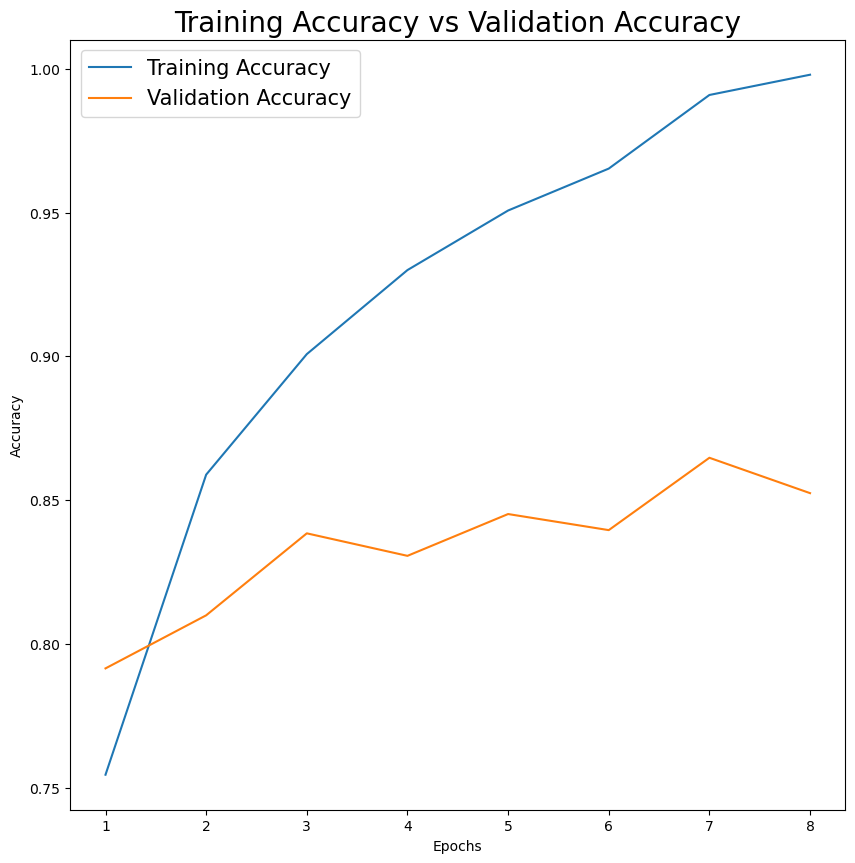

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of epochs
epochs = 8

# Plotting the training accuracy and validation accuracy over epochs
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, epochs+1), history_noda.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, epochs+1), history_noda.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy', fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(fontsize=15)
plt.show()